In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
pd.set_option('precision',3)


Bad key "text.kerning_factor" on line 4 in
C:\Users\dutchr01\AppData\Local\Continuum\anaconda3\envs\pycaret\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv(r'D:\Python ML\SA_Geology_protolith_predictions\data\external\classifier_data_2019-02-26_ilr_training.csv',encoding = "ISO-8859-1", engine='python')
df1 = pd.read_csv(r'D:\Python ML\SA_Geology_protolith_predictions\data\external\classifier_data_2019-02-26_ilr_validation.csv',encoding='ISO-8859-1', engine= 'python')

In [3]:
df2 = df.append(df1)

In [4]:
df2.head()

,rock_group,rock_type,sample_id,author,title,journal,year,doi,bibtex,sio2,tio2,al2o3,feo_tot,mgo,cao,na2o,k2o,p2o5,index,coord_1,coord_2,coord_3,coord_4,coord_5,coord_6,coord_7,coord_8
0,igneous,granodiorite,16,BAS_GEOLDB,NaN,NaN,NaN,NaN,NaN,69.276,0.408,16.143,1.847,1.531,3.949,4.306,2.439,0.102,16,3.630,-0.907,1.236,1.126,0.054,-0.035,0.502,3.435
1,igneous,granodiorite,60,Mikhalsky; E.V.; Kamenev; I.A.; 2013. Recurren...,NaN,NaN,NaN,NaN,NaN,63.987,1.545,15.110,7.763,2.469,4.227,2.276,2.297,0.325,60,2.633,-0.342,0.335,1.284,0.558,1.044,0.896,2.633
2,igneous,basaltic andesite,65,BAS_GEOLDB,NaN,NaN,NaN,NaN,NaN,52.152,1.833,18.194,6.322,5.993,10.441,4.222,0.535,0.309,65,2.368,-0.507,0.557,0.479,-0.116,0.741,2.573,2.788
3,igneous,quartz monzonite,67,Champion; D. C.; Budd; A. R.; Hazell; M. S.; a...,NaN,NaN,NaN,NaN,NaN,69.047,0.726,14.730,3.253,0.777,2.435,2.956,5.872,0.205,67,3.221,-0.598,0.885,1.966,0.563,0.296,-0.385,2.825
4,igneous,monzodiorite,71,Champion; D. C.; Budd; A. R.; Hazell; M. S.; a...,NaN,NaN,NaN,NaN,NaN,52.104,2.643,14.962,7.206,7.174,8.910,3.225,2.880,0.895,71,2.108,-0.198,0.492,0.385,0.117,1.040,1.006,1.989


In [5]:
df2 = df2[['rock_group', 'rock_type', 'sio2','tio2', 'al2o3', 'feo_tot' ,'mgo', 'cao' ,'na2o', 'k2o', 'p2o5']]
df3 = df2.copy()

In [6]:
df3['Na2O+K2O'] = df3['na2o'] + df3['k2o']
df3['Log_Na2O/K2O'] = np.log10(df3['na2o'] / df3['k2o'])
df3['Mg#'] = df3['mgo'] / (df3['mgo'] + df3['feo_tot'])
df3['log_sio2/al2o3'] = np.log10(df3['sio2']/df3['al2o3'])
df3['log_fe/k'] = np.log10(df3['feo_tot']/df3['k2o'])

In [7]:
df3.head(5)

,rock_group,rock_type,sio2,tio2,al2o3,feo_tot,mgo,cao,na2o,k2o,p2o5,Na2O+K2O,Log_Na2O/K2O,Mg#,log_sio2/al2o3,log_fe/k
0,igneous,granodiorite,69.276,0.408,16.143,1.847,1.531,3.949,4.306,2.439,0.102,6.745,0.247,0.453,0.633,-0.121
1,igneous,granodiorite,63.987,1.545,15.110,7.763,2.469,4.227,2.276,2.297,0.325,4.573,-0.004,0.241,0.627,0.529
2,igneous,basaltic andesite,52.152,1.833,18.194,6.322,5.993,10.441,4.222,0.535,0.309,4.757,0.897,0.487,0.457,1.072
3,igneous,quartz monzonite,69.047,0.726,14.730,3.253,0.777,2.435,2.956,5.872,0.205,8.828,-0.298,0.193,0.671,-0.256
4,igneous,monzodiorite,52.104,2.643,14.962,7.206,7.174,8.910,3.225,2.880,0.895,6.106,0.049,0.499,0.542,0.398


In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533360 entries, 0 to 53335
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   rock_group      533360 non-null  object 
 1   rock_type       524282 non-null  object 
 2   sio2            533360 non-null  float64
 3   tio2            533360 non-null  float64
 4   al2o3           533360 non-null  float64
 5   feo_tot         533360 non-null  float64
 6   mgo             533360 non-null  float64
 7   cao             533360 non-null  float64
 8   na2o            533360 non-null  float64
 9   k2o             533360 non-null  float64
 10  p2o5            533360 non-null  float64
 11  Na2O+K2O        533360 non-null  float64
 12  Log_Na2O/K2O    533360 non-null  float64
 13  Mg#             533360 non-null  float64
 14  log_sio2/al2o3  533360 non-null  float64
 15  log_fe/k        533360 non-null  float64
dtypes: float64(14), object(2)
memory usage: 69.2+ MB


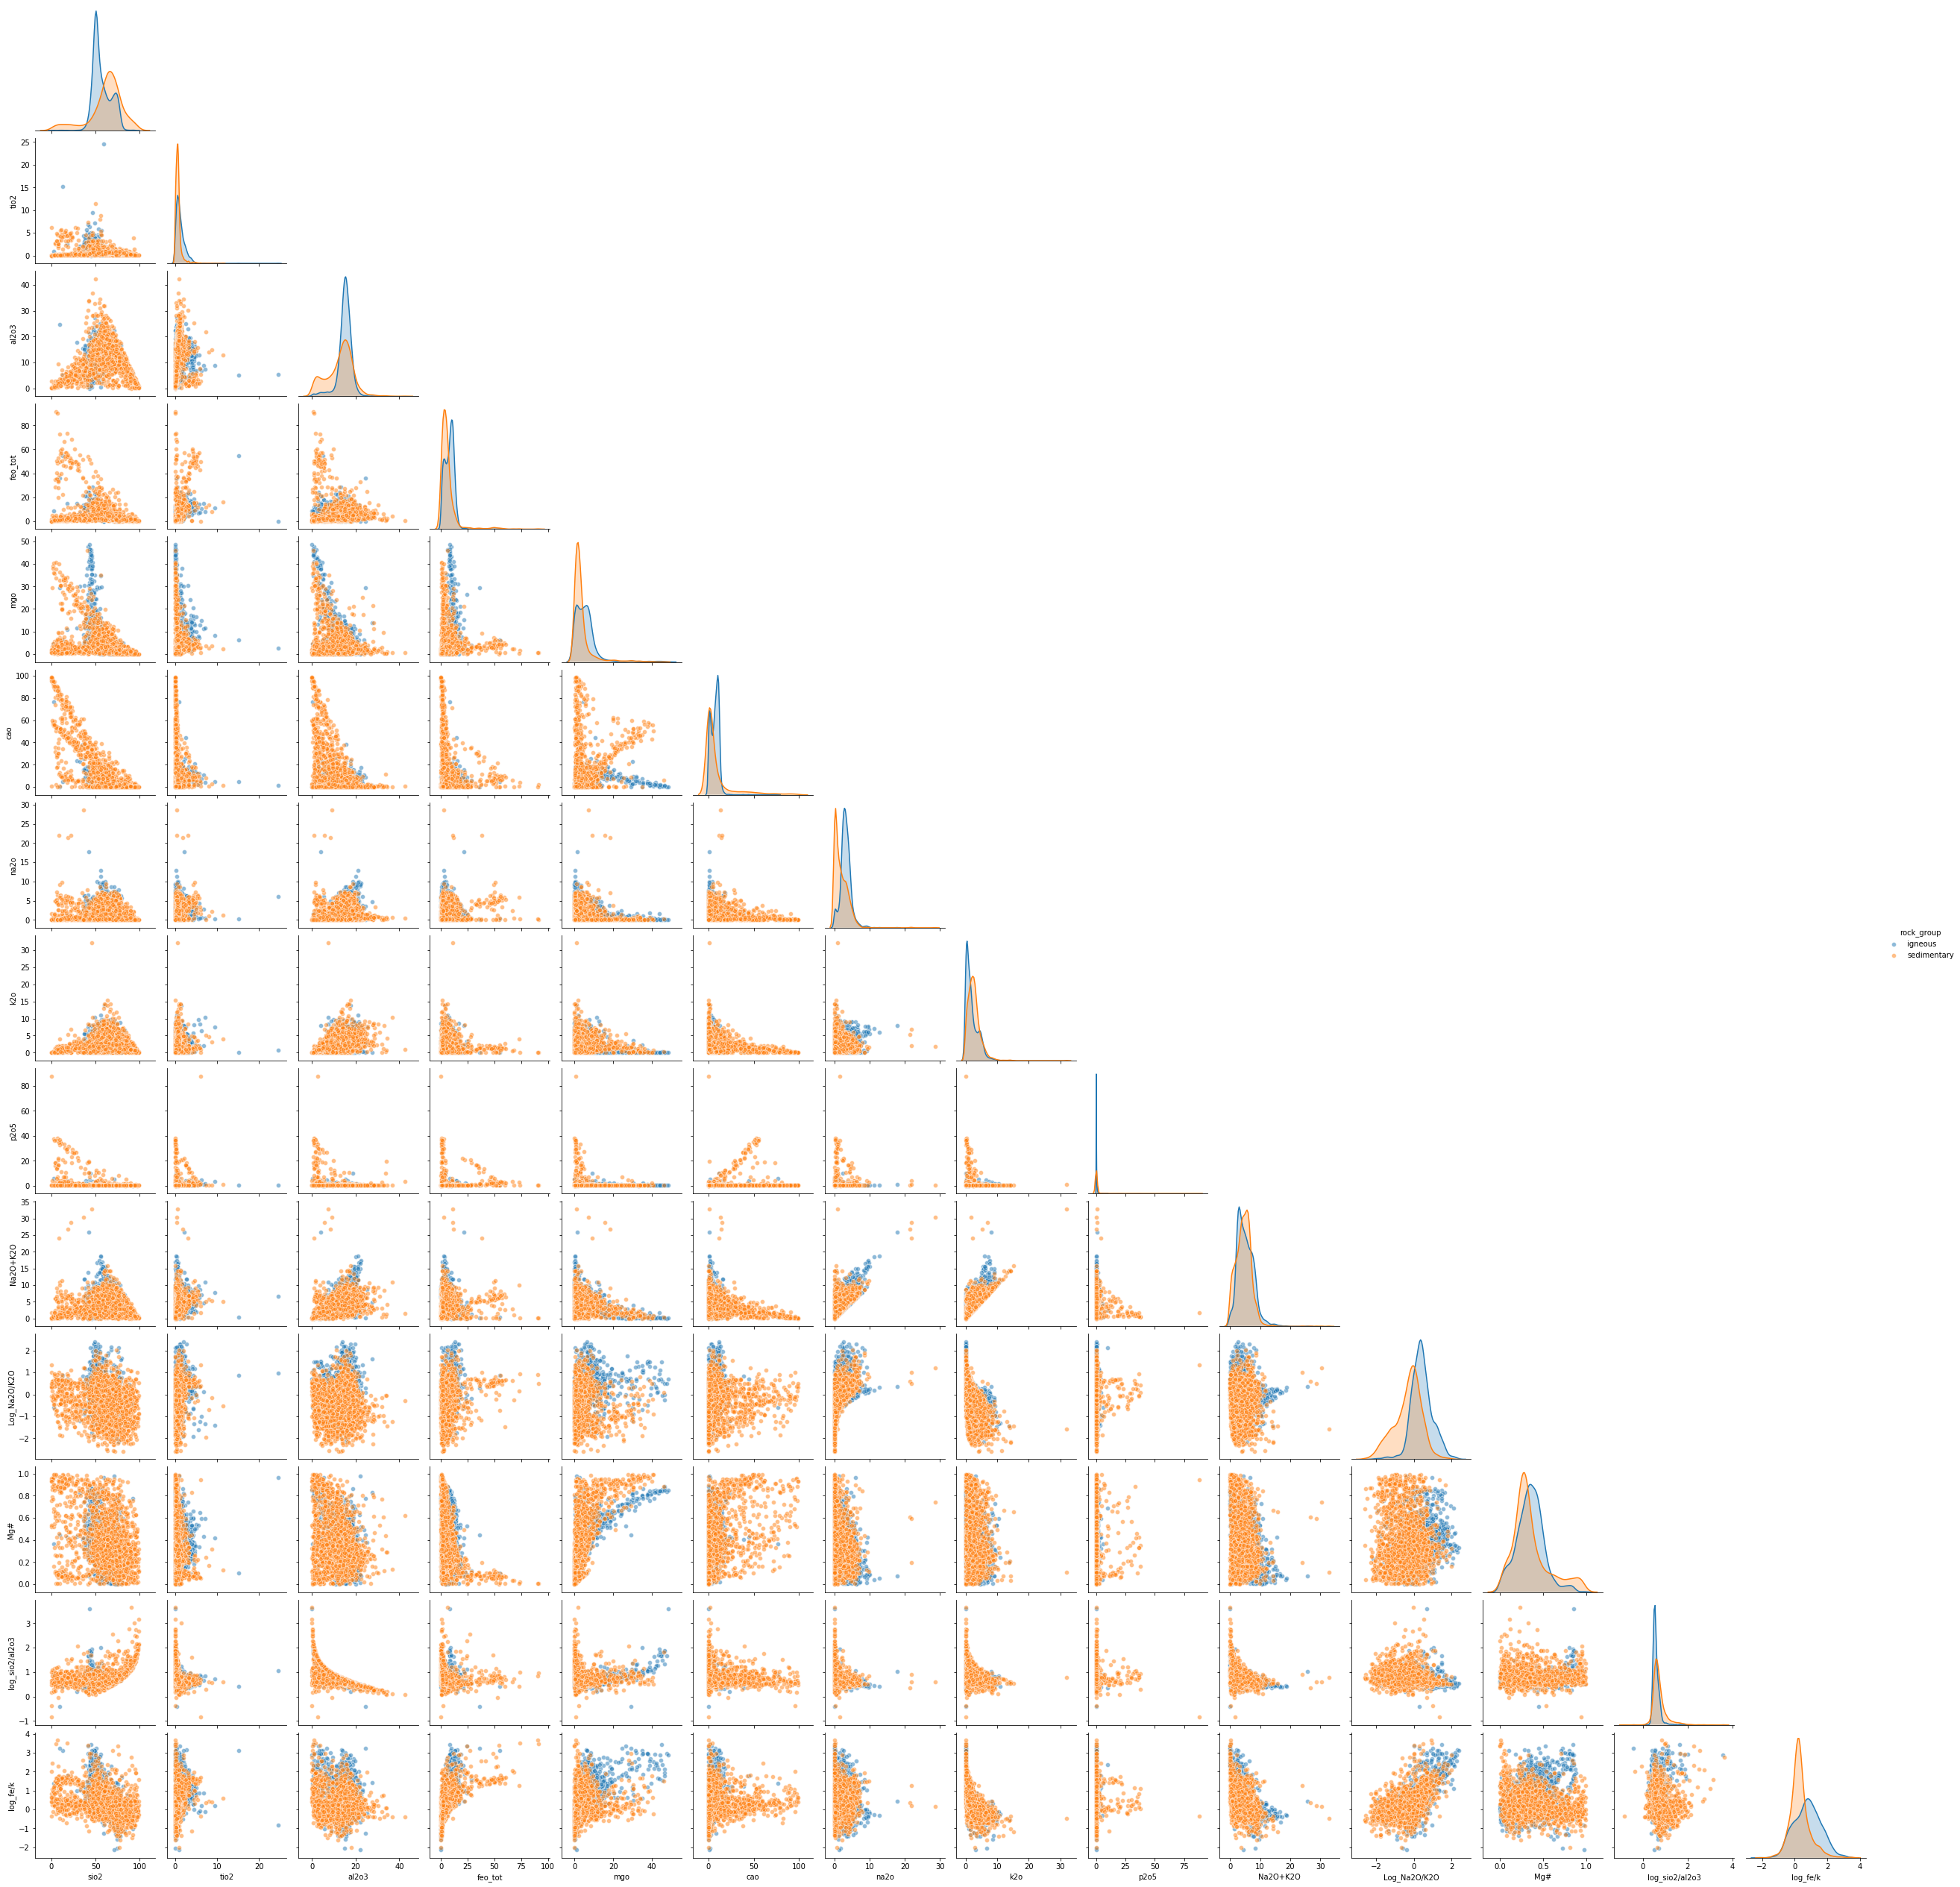

In [9]:
df_tmp1 = df3[df3['rock_group'] == 'igneous'].sample(2500)
df_tmp2 = df3[df3['rock_group'] == 'sedimentary'].sample(2500)
df_bal = df_tmp1.append(df_tmp2)
sns.pairplot(df_bal, hue='rock_group', corner=True, plot_kws={'alpha':0.5},)

In [10]:
df_log = df2.select_dtypes(exclude= 'object').apply(np.log).join(df2['rock_group'])

In [11]:
df_log.head()

,sio2,tio2,al2o3,feo_tot,mgo,cao,na2o,k2o,p2o5,rock_group
0,4.238,-0.896,2.781,0.614,0.426,1.373,1.460,0.891,-2.282,igneous
0,4.238,-0.896,2.781,0.614,0.426,1.373,1.460,0.891,-2.282,igneous
0,4.296,-0.891,2.673,-0.591,-0.819,0.544,1.176,1.721,-2.095,igneous
0,4.296,-0.891,2.673,-0.591,-0.819,0.544,1.176,1.721,-2.095,igneous
1,4.159,0.435,2.715,2.049,0.904,1.442,0.823,0.831,-1.123,igneous


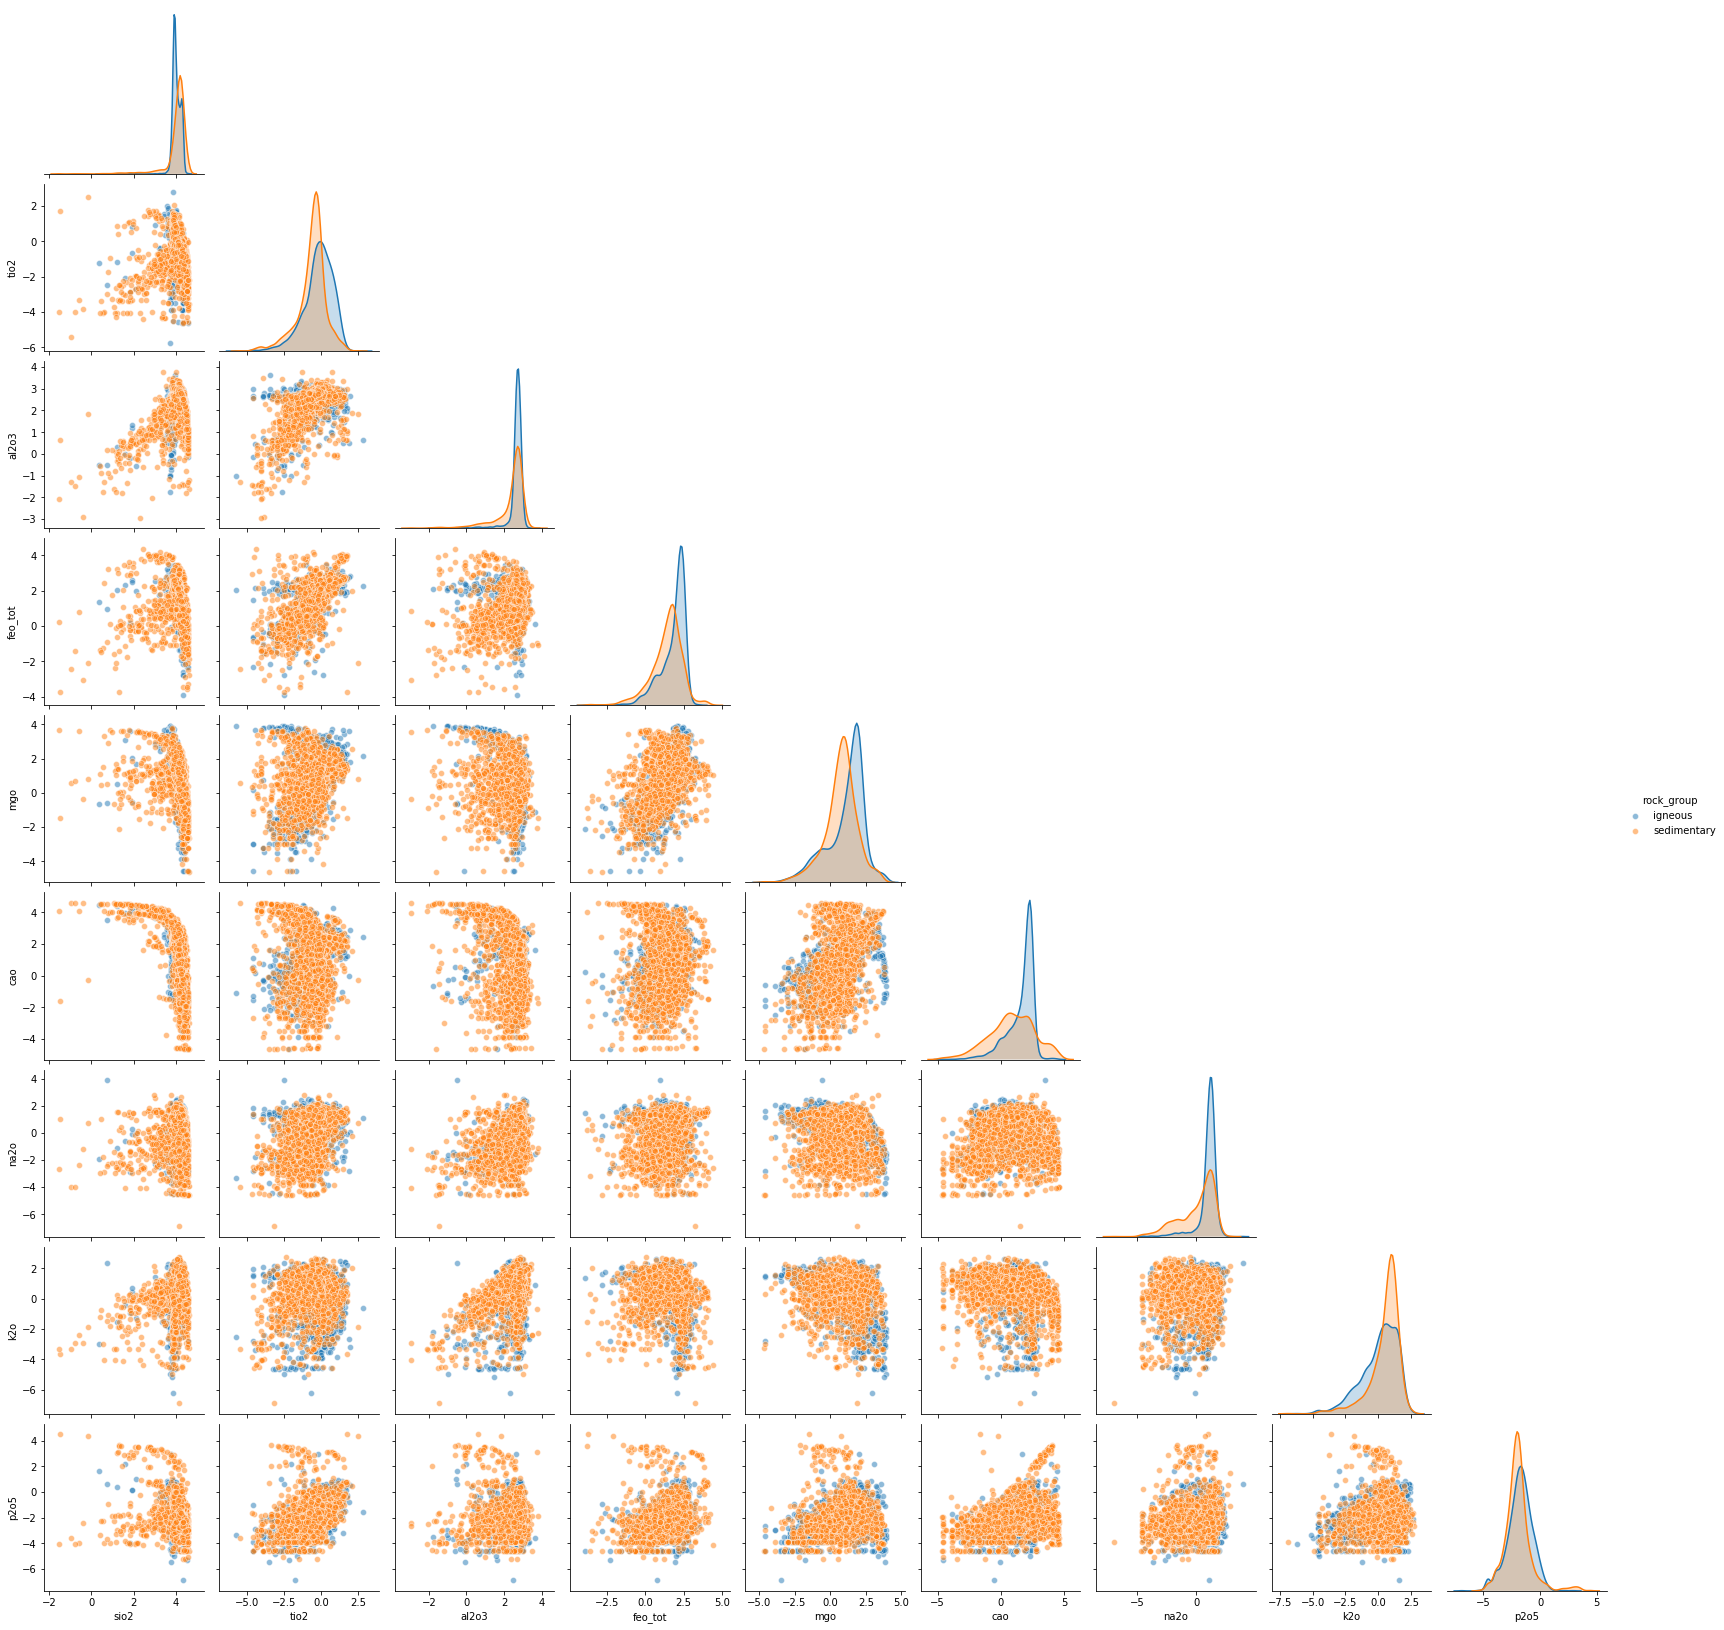

In [12]:
df_tmp3 = df_log[df_log['rock_group'] == 'igneous'].sample(2500)
df_tmp4 = df_log[df_log['rock_group'] == 'sedimentary'].sample(2500)
df_bal2 = df_tmp3.append(df_tmp4)
sns.pairplot(df_bal2, hue='rock_group', corner=True, plot_kws={'alpha':0.5},)